<a href="https://colab.research.google.com/github/Ikhlashmulya/sentiment-analysis/blob/main/Sentimen_analisis_Naive_Bayes_Classification_tugas_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentiment Analysis

In [ ]:
!pip install sastrawi
!pip install textblob
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Data Preparation

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/data_scraping_ukt_unsoed.csv", encoding="latin-1", parse_dates=["created_at"])
data.head()

<ipython-input-4-aa7d75f6d9ee>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("/content/drive/MyDrive/data_scraping_ukt_unsoed.csv", encoding="latin-1", parse_dates=["created_at"])


,user,text,created_at
0,Faktacom,"Presiden BEM Unsoed, Maulana Ihsan menyampaika...",2024-05-18 08:00:01+00:00
1,Cul de Sac,@BhinnekaOSINT @ardisatriawan Kalau perbanding...,2024-05-18 07:59:52+00:00
2,Ayaaa,Ada aja w lagi kondangan denger obrolan ukt un...,2024-05-18 04:42:36+00:00
3,Sahlanited,@nblizza @Ahmd_Zulfahmi @dwi_ciderman @PeelotV...,2024-05-18 03:13:56+00:00
4,Ca.,18 smt é¦æ§¶é½æ¿ç¬ hamdalah ukt di kampusk...,2024-05-18 02:33:33+00:00


In [ ]:
data = data[["text", "created_at"]]
data.head(5)

,text,created_at
0,"Presiden BEM Unsoed, Maulana Ihsan menyampaika...",2024-05-18 08:00:01+00:00
1,@BhinnekaOSINT @ardisatriawan Kalau perbanding...,2024-05-18 07:59:52+00:00
2,Ada aja w lagi kondangan denger obrolan ukt un...,2024-05-18 04:42:36+00:00
3,@nblizza @Ahmd_Zulfahmi @dwi_ciderman @PeelotV...,2024-05-18 03:13:56+00:00
4,18 smt é¦æ§¶é½æ¿ç¬ hamdalah ukt di kampusk...,2024-05-18 02:33:33+00:00


In [ ]:
data.isna().sum()

text          0
created_at    0
dtype: int64

In [ ]:
data = data.dropna()
data.isna().sum()

text          0
created_at    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [ ]:
data = data.rename(columns={"Tweet" : "text"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   text        378 non-null    object             
 1   created_at  378 non-null    datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 6.0+ KB


## Cleaning Text

In [ ]:
import string
import re
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

def cleaningText(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text)  # remove mentions
    text = re.sub(r"#[A-Za-z0-9]+", "", text)  # remove hashtag
    text = re.sub(r"RT[\s]", "", text)  # remove RT
    text = re.sub(r"http\S+", "", text)  # remove link
    text = re.sub(r"[0-9]+", "", text)  # remove numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    text = text.replace("\n", " ")  # replace new line into space
    text = text.translate(
        str.maketrans("", "", string.punctuation)
    )  # remove all punctuations
    text = text.strip(" ")  # remove characters space from both left and right text
    for emoji, meaning in emojis.items():
        text = text.replace(emoji, "EMOJI" + meaning)
    text = text.lower()

    #print(text)
    return text

data["text_clean"] = data["text"].apply(cleaningText)
data.head(5)

,text,created_at,text_clean
0,"Presiden BEM Unsoed, Maulana Ihsan menyampaika...",2024-05-18 08:00:01+00:00,presiden bem unsoed maulana ihsan menyampaikan...
1,@BhinnekaOSINT @ardisatriawan Kalau perbanding...,2024-05-18 07:59:52+00:00,kalau perbandingan antara kampus medioker misa...
2,Ada aja w lagi kondangan denger obrolan ukt un...,2024-05-18 04:42:36+00:00,ada aja w lagi kondangan denger obrolan ukt un...
3,@nblizza @Ahmd_Zulfahmi @dwi_ciderman @PeelotV...,2024-05-18 03:13:56+00:00,zulfahmi ciderman gylberth bravob owh ini\r i...
4,18 smt é¦æ§¶é½æ¿ç¬ hamdalah ukt di kampusk...,2024-05-18 02:33:33+00:00,smt hamdalah ukt di kampusku gk bgitu tinggi ...


## Word Tokenizing

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

def tokenizingText(text):  # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

data["text_clean"] = data["text_clean"].apply(tokenizingText)
data.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,text,created_at,text_clean
318,@tanyakanrl Karena PTN-BH. Waktu ngurus wisuda...,2024-04-23 14:48:28+00:00,"[karena, ptnbh, waktu, ngurus, wisuda, tahun, ..."
104,@98rapunzel @strxxngers @tanyakanrl jangan tol...,2024-05-02 02:33:22+00:00,"[jangan, tolol, itu, mereka, lg, demo, karna, ..."
103,@beyya1202 @tanyakanrl @timothyronald22 jangan...,2024-05-02 02:34:07+00:00,"[jangan, tolol, mereka, lg, demo, karna, ukt, ..."
314,waw dapet info dari mas ku katanya ukt unsoed ...,2024-04-23 15:16:42+00:00,"[waw, dapet, info, dari, mas, ku, katanya, ukt..."
195,https://t.co/RqHHVjqvB1\r\nBerapa Biaya UKT Un...,2024-04-26 07:49:44+00:00,"[berapa, biaya, ukt, unsoed, viral, keluhan, m..."


## Remove Stopwords

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords

def filteringText(text):
    filtered = [word for word in text if word not in stopwords.words("indonesian", "english")]
    return filtered

data["text_clean"] = data["text_clean"].apply(filteringText)
data.sample(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,created_at,text_clean
105,"@deluvanese @tanyakanrl tolol amat, tu mereka ...",2024-05-02 02:30:24+00:00,"[tolol, tu, demo, karna, ukt, unsoed]"
131,@kegblgnunfaedh ada yg tau kenapa ukt unsoed s...,2024-04-30 13:04:57+00:00,"[yg, tau, ukt, unsoed, banget]"
245,"kalo dipikir2 lucu jg, mas crush pernah ditany...",2024-04-24 15:13:36+00:00,"[kalo, dipikir, lucu, jg, mas, crush, sm, papa..."
23,kapanan ak pernah bahas ukt unsoed dan kukira ...,2024-05-13 01:14:32+00:00,"[kapanan, ak, bahas, ukt, unsoed, kukira, aja,..."
130,@howluckyfifii @kegblgnunfaedh Bukan cuma Unso...,2024-04-30 13:08:57+00:00,"[unsoed, kak, kampusku, jg, banget, buset, kas..."


## Stemming word

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmingText(text):  # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    text = [stemmer.stem(word) for word in text]
    return text

data["text_clean"] = data["text_clean"].apply(stemmingText)
data.sample(5)

,text,created_at,text_clean
204,é¦å¸ Opini jelek gimana sih? aku lolos snbp ...,2024-04-25 23:25:02+00:00,"[opini, jelek, gimana, sih, lolos, snbp, unsoe..."
120,BEM Unsoed: UKT Mahasiswa Naik dari Rp 9 Juta ...,2024-05-01 02:57:10+00:00,"[bem, unsoed, ukt, mahasiswa, rp, juta, rp, ju..."
242,Liat ukt unsoed naik 4x lipat é¦æªª gk kaget ...,2024-04-24 16:14:16+00:00,"[liat, ukt, unsoed, x, lipat, gk, kaget, xixix..."
302,Jdi gk semangat belajar setelah denger berita ...,2024-04-23 16:12:20+00:00,"[jdi, gk, semangat, ajar, denger, berita, ukt,..."
324,"@ahyucils tergantung prodii, tapi itu bisa ae ...",2024-04-23 14:13:00+00:00,"[gantung, prodii, ae, ancen, mak, bapake, baya..."


In [ ]:
def toSentence(list_words):  # Convert list of words into sentence
    sentence = " ".join(word for word in list_words)
    return sentence

data["text_clean"] = data["text_clean"].apply(toSentence)
data.sample(5)

,text,created_at,text_clean
27,Isi reply nya pada masalahin fasilitas tapi ga...,2024-05-10 18:30:05+00:00,isi reply nya masalahin fasilitas gak ukt gima...
261,@qaonxiavla @tanyakanrl G tau ya kalau unsoed ...,2024-04-24 08:05:15+00:00,g tau ya unsoed gimana kampus tau gak ubah ukt...
235,jends pls banget cuma mau ngingetin kenaikan u...,2024-04-24 20:05:36+00:00,jends pls banget ngingetin naik ukt ni angkat ...
143,jends temen aku yang anak ugm ternyata tau kal...,2024-04-30 04:43:07+00:00,jends temen anak ugm tau kalo ukt unsoed bange...
236,"Dear Unsoed, lu bisa menjamin apa si dengan UK...",2024-04-24 18:20:25+00:00,dear unsoed lu jamin si ukt lu digit kelas top...


## Text length cleaning

In [ ]:
text_len = []

for text in data["text_clean"]:
    text_len.append(len(text.split(" ")))

data["text_len"] = text_len
data.sample(5)

,text,created_at,text_clean,text_len
260,"@Mas57024705 @tanyakanrl Kagak, ini emang stan...",2024-04-24 08:07:20+00:00,kagak emang standar uktnya unsoed karna ubah s...,18
79,"""Orang Miskin Dilarang Sarjana""\r\n\r\nett tol...",2024-05-03 01:19:23+00:00,orang miskin larang sarjana ett tolol rektor u...,15
322,[cm] pernah gasi kampus kalian uktnya naik dra...,2024-04-23 14:22:34+00:00,cm gas kampus uktnya drastis sender lg sebel b...,14
275,@bimaspputraa @tanyakanrl gue termasuk orang y...,2024-04-24 02:57:35+00:00,gue orang bayar ukt tp gmn teman kuliah unsoed...,24
62,@AiraNtieReal Whaa kereen..\r\nSukses k jepang...,2024-05-04 23:31:02+00:00,whaa kereen sukses k jepang nya yaa lulus ui e...,32


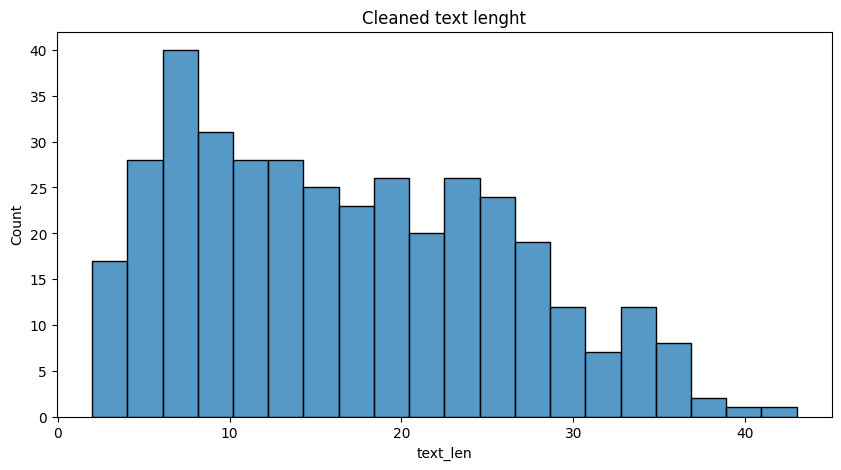

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x="text_len", data=data, bins=20)
plt.title("Cleaned text lenght")
plt.show()

<ipython-input-15-18e98e8ea66a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="text_len", data=data[data["text_len"] < 10], palette="mako")


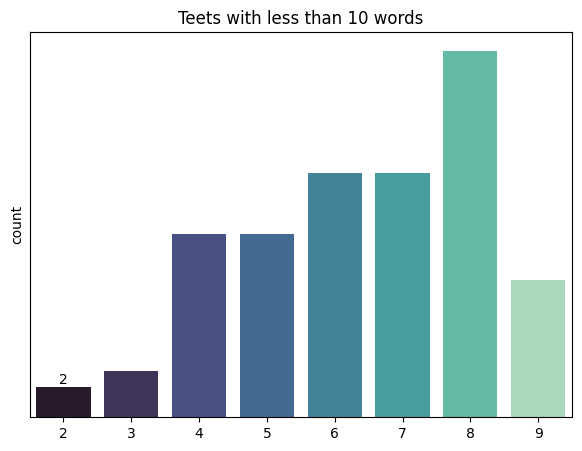

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="text_len", data=data[data["text_len"] < 10], palette="mako")
plt.title("Teets with less than 10 words")
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel("count")
plt.xlabel("")
plt.show()

In [ ]:
data = data[data["text_len"] > 2]

## data labelling

In [ ]:
from textblob import TextBlob
import textblob.exceptions

sentiment = []

for i, text in enumerate(data["text_clean"]):
    try:
        tb = TextBlob(text)
        tb = tb.translate(from_lang="id",to="en")
        if tb.sentiment.polarity > 0.0:
             sentiment.append("positif")
        else:
             sentiment.append("negatif")
    except (textblob.exceptions.TranslatorError, textblob.exceptions.NotTranslated):
        sentiment.append("netral")
    except Exception as e:
        sentiment.append("netral")

data["sentiment"] = sentiment
data.sample(5)

,text,created_at,text_clean,text_len,sentiment
58,@realujeeerrr @abu_waras gausah peduliin anis ...,2024-05-05 05:51:53+00:00,waras gausah peduliin anis dukung wowkwowk ora...,24,positif
243,UKT Unsoed beneran naik ya,2024-04-24 15:25:38+00:00,ukt unsoed beneran ya,4,positif
275,@bimaspputraa @tanyakanrl gue termasuk orang y...,2024-04-24 02:57:35+00:00,gue orang bayar ukt tp gmn teman kuliah unsoed...,24,negatif
42,"@sbmptnfess Nih ya nder gue kasi tau, unsoed n...",2024-05-08 12:00:17+00:00,nih ya nder gue kasi tau unsoed ngeluarin bija...,33,positif
219,tadinya pengen masuk unsoed tapi gaboleh mama ...,2024-04-25 08:21:16+00:00,ken masuk unsoed gaboleh mama paksa nurut unne...,13,negatif


## Modelling

In [ ]:
dataset = data[["text_clean", "sentiment"]]
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = []

for n in dataset:
    if(n[1] == 'positif'):
      set_positif.append(n)
    else:
      set_negatif.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))

train = set_positif + set_negatif

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Accuracy:', cl.accuracy(dataset))

Accuracy: 0.8031914893617021


## Evalution

In [ ]:
data_tweet = list(data['text_clean'])
polaritas = 0

status = []
total_positif = total_negatif = total = 0

for i, tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet, classifier=cl)
    if analysis.classify() == 'positif':
        total_positif += 1
    else:
        total_negatif += 1

    status.append(analysis.classify())
    total += 1

print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 79
Negatif = 297

Total Data : 376


In [ ]:
status = pd.DataFrame({'klasifikasi_bayes': status})
data['klasifikasi_bayes'] = status

In [ ]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if n[4] != n[5]:
       print(f'Text: {n[2]}\nClassifier: {n[4]}\nClassifier Bayes: {n[5]} \n')

Text: kaya jaman ukt ya unsoed sm ub kampus biru ciputat jg ikut beting heran gada abis ukt jt fasilitas belakang
Classifier: positif
Classifier Bayes: negatif 

Text: oke tweet guru negeri ui unsoed unri usu unnes et al uang pangkal ukt orang tua amp mahasiswa jerit rakyat biar bodoh kuliah oke spy dapet bansos tunduk bagi bltbansos
Classifier: positif
Classifier Bayes: negatif 

Text: unsoed purwokerto riau medan skrg semarang mahasiswa demo akibat ukt drat ok gas ok gas ok gas
Classifier: positif
Classifier Bayes: negatif 

Text: gw milih unsoed pas snbt krn murahpas udh fixed ukt
Classifier: positif
Classifier Bayes: negatif 

Text: baca anjing mangkanya ukt unsoed pas udh terima snbp ah gblog banget sia anjg
Classifier: positif
Classifier Bayes: negatif 

Text: enak bgt lu ngetik yg milih kampus yg mahal ukt nya ukt unsoed pas snbp snbt dah tutup daftar ga tau ya naek
Classifier: positif
Classifier Bayes: negatif 

Text: kuliah gratis noh ukt unsoed haji
Classifier: positif
Classi

## Data Visualization

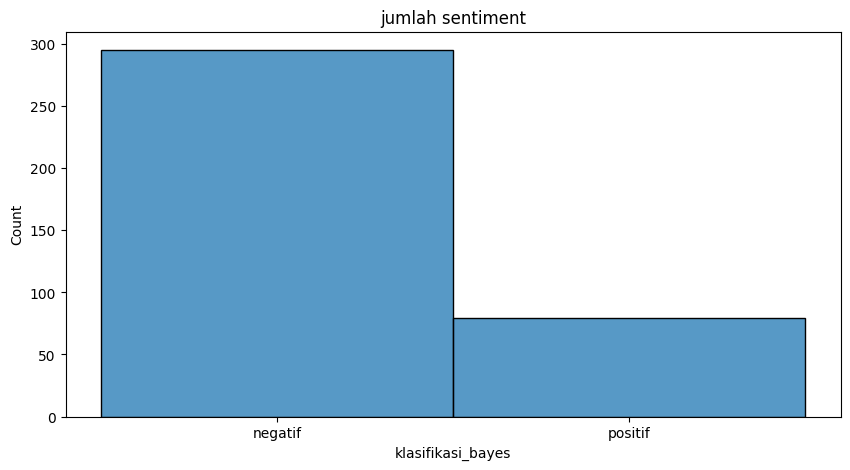

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x="klasifikasi_bayes", data=data, bins=20)
plt.title("jumlah sentiment")
plt.show()

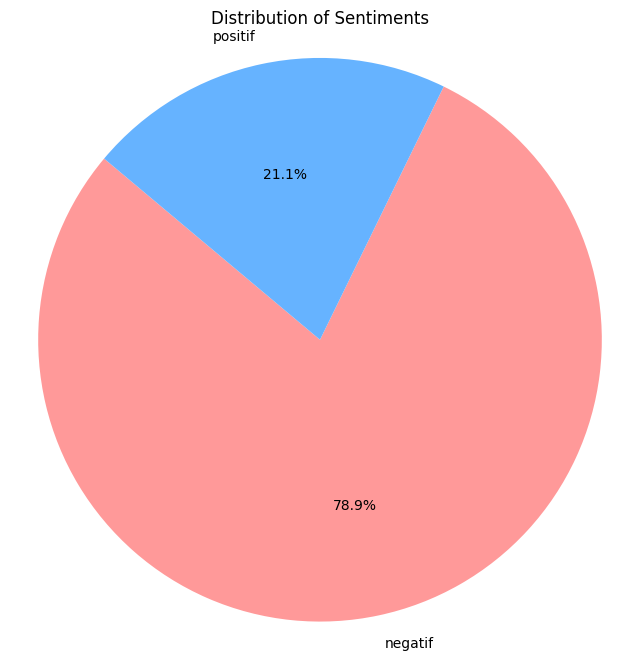

In [ ]:
# Menghitung frekuensi untuk setiap klasifikasi
sentiment_counts = data['klasifikasi_bayes'].value_counts()

# Plot pie chart menggunakan matplotlib
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

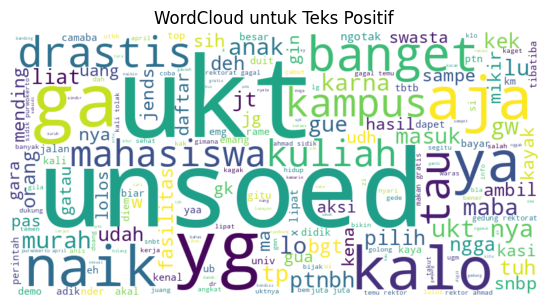

In [ ]:

from wordcloud import WordCloud

# Filter teks berdasarkan sentimen
positif_text = " ".join(text for text in data[data['klasifikasi_bayes'] == "positif"]['text_clean'])

# Membuat WordCloud untuk teks positif
wordcloud_positif = WordCloud(width=800, height=400, background_color='white').generate(positif_text)

# Menampilkan WordCloud
plt.figure(figsize=(15, 8))

# WordCloud untuk teks positif
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.title("WordCloud untuk Teks Positif")
plt.axis("off")

plt.show()

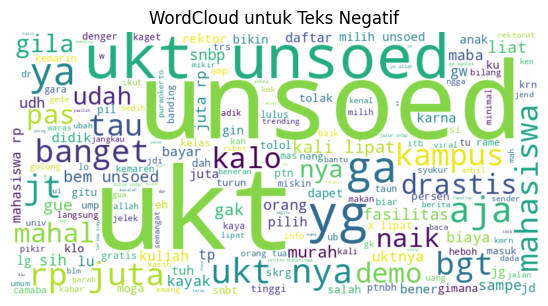

In [ ]:
# Filter teks berdasarkan sentimen
negatif_text = " ".join(text for text in data[data['klasifikasi_bayes'] == "negatif"]['text_clean'])

# Membuat WordCloud untuk teks negatif
wordcloud_negatif = WordCloud(width=800, height=400, background_color='white').generate(negatif_text)

# Menampilkan WordCloud
plt.figure(figsize=(15, 8))

# WordCloud untuk teks negatif
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.title("WordCloud untuk Teks Negatif")
plt.axis("off")

plt.show()